Milja Lempinen <br>
520600 <br>
mmlemp@utu.fi  <br>
5.12.2021  <br>

# Data Analysis and Knowledge Discovery: Exercise 3, Supervised learning

This is the template for the third exercise. The idea of this exercise is to apply supervised learning to predict the ship type using certain attributes (speed, destination harbour...) and a K nearest neighbors (kNN) classifier.

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistant responsible for the exercise, Valtteri Nieminen, vajnie@utu.fi <font color = red></font>
- Note! Don't leave it to the last moment! No feedback service during weekends.
- The deadline is <font color = red> on 6.12, 19:00</font>
- Using the colors for titles in markdown makes the document more readable and easier to check. 

- This excercise is a bit more freeform than the last one and you don't have to stick to only the cells that are already in the notebook - you can make more if you need to, but it is advisable to comment on new cells what the cell is related to. 
- There are also added summaries of whats included inthe subparts of exercises  just to help you get a better picture of what is required. You will still answer these excercises under their own titles.

### Gather **all** packages needed for this notebook here:
- you can use other packages as well, but this excercise can be completed with those below

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut

________
## <font color = dimgrey> Data import </font> 


In [2]:
data_path = "https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata_2021.csv"

In [3]:
#Import the data here
data = pd.read_csv(data_path) #data is presumed to be in the same folder. 

_______________
## <font color = dimgrey> 1) Data preprocessing
Below are all the questions related to this topic, but you should put them under their own respective titles that are found below.

- a) First, find out how many different destinations there are in the data. Do you need to make any preprocessing? **1p** <br>
- b) Destination harbor is a categorical variable. It needs to be converted into a numerical representation. Explain, why do you need to make this step? You can use get_dummies from pandas to implement one-hot coding for categorical features **1p**

- c) Plot Gross tonnage versus the ship Length. Use different colors for different ship types. According to the plot, there is one <b> clear outlier. </b>  Correct the outlying value by changing it to the value 326 and rerun the plot after you have made the correction. **1p**
- d) It is good to exploit domain knowledge and make some reasonable transformation to the feature values to improve the expected results and/or to avoid redundancy. Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. You can find the needed information  https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried **1p**
- e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, the ***transformed length*** variable, and breadth **1p**
_______________________

#### <font color = dimgrey> a) Find out how many different destinations there are in the data. Are there any mistakes and do you need to do any preprocessing? Give your code and answer below **1p** </font>

In [4]:
print(data['Destination'].nunique())
print(data['Destination'].unique())

print(data.isnull().sum())

17
['Hamina' 'Helsinki' 'Kotka' 'Kronshtadt' 'Kunda' 'Muuga' 'Paldiski'
 'Porvoo' 'Primorsk' 'Sillamäe' 'Sillamae' 'Tallinn' 'Ust-Luga'
 'Valko-Loviisa' 'Viipuri' 'Vuosaari' 'Vysotsk']
MMSI             0
Speed            0
COG              0
Destination      0
Ship_type        0
Gross_tonnage    0
Length           0
Breadth          0
dtype: int64


<font color = green> There are 17 different destinations, but the destination "Sillamäe" is in the dataframe twice, with different spelling. This needs to be corrected so that there is only one spelling. There are no null values in the data, which means that those need no correcting.

In [5]:
#Correcting the spelling of "Sillamäe" to "Sillamae" to avoid any spelling-related issues.

data['Destination'].replace(to_replace='Sillamäe', value='Sillamae', inplace=True)
print(data['Destination'].unique())

['Hamina' 'Helsinki' 'Kotka' 'Kronshtadt' 'Kunda' 'Muuga' 'Paldiski'
 'Porvoo' 'Primorsk' 'Sillamae' 'Tallinn' 'Ust-Luga' 'Valko-Loviisa'
 'Viipuri' 'Vuosaari' 'Vysotsk']


____________
#### <font color = dimgrey> b) Destination harbor is a categorical variable. It needs to be somehow converted into a numerical expression. Explain, why do you need to make this step? 
You can use get_dummies from pandas to implement onehot coding for categorical features **1p**

In [6]:
pd.get_dummies(data['Destination'], prefix='Destination')

destination_dummies = pd.get_dummies(data['Destination'], prefix='Destination')
data = pd.concat([data, destination_dummies], axis=1)

<font color = green> Learning algorithms can't use categoricals. They need to be converted into easily accessible True/False statements.

_______________
####  <font color = dimgrey> c) Plot Gross tonnage versus the ship Length. 

- Use different colors for different ship types. According to the plot, there is one <b> clear </b> outlier. <b> Correct the outlying value by changing it to the value 326 </b> and rerun the plot after you have made the correction. **1p**
- If you want to do things very nicely you could wrap the plotting in a function so you don't paste the same code twice, but this is not required.

In [7]:
print(data['Ship_type'].unique())

['Cargo' 'Tanker' 'Tug']


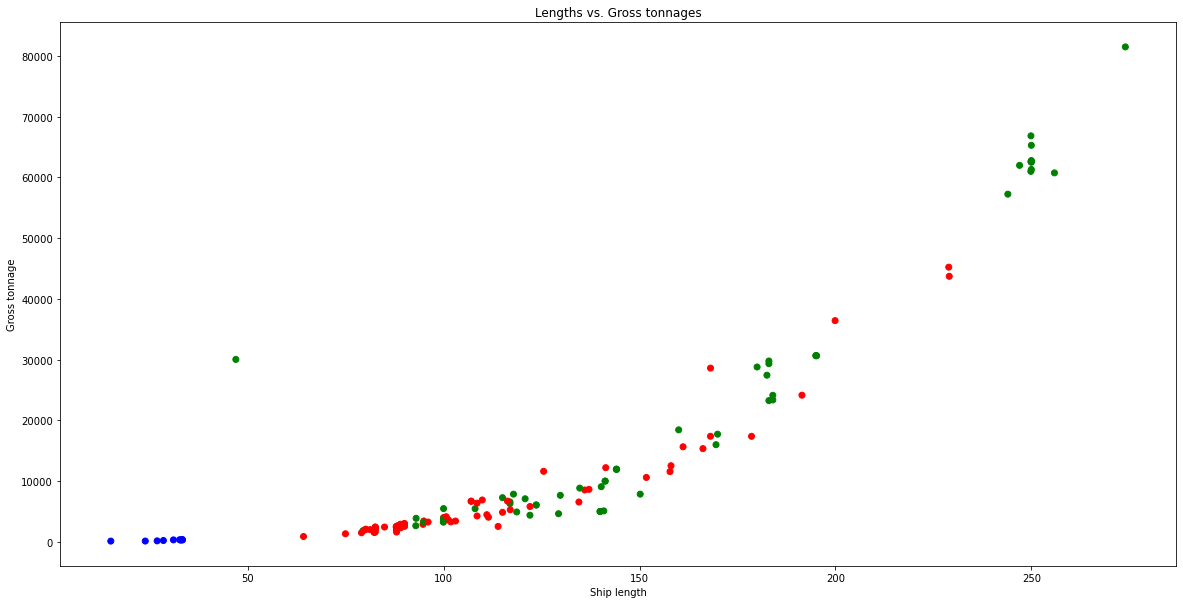

In [8]:
colors = {'Cargo':'red', 'Tanker':'green', 'Tug':'blue'}
plt.figure(figsize=(20,10))
plt.ylabel('Gross tonnage')
plt.xlabel('Ship length')
plt.title('Lengths vs. Gross tonnages')
plt.scatter(data=data, x='Length', y='Gross_tonnage', c=data['Ship_type'].map(colors))
plt.show()

In [9]:
#Locating the data
print(data.loc[data.Length<60, 'Ship_type'])

19        Tug
37        Tug
45        Tug
48        Tug
81        Tug
82        Tug
83     Tanker
85        Tug
86        Tug
109       Tug
Name: Ship_type, dtype: object


In [10]:
#Replacing the outlier
data['Gross_tonnage'].replace(data['Gross_tonnage'].loc[83], 326, inplace=True)

print(data['Gross_tonnage'].loc[83])

326


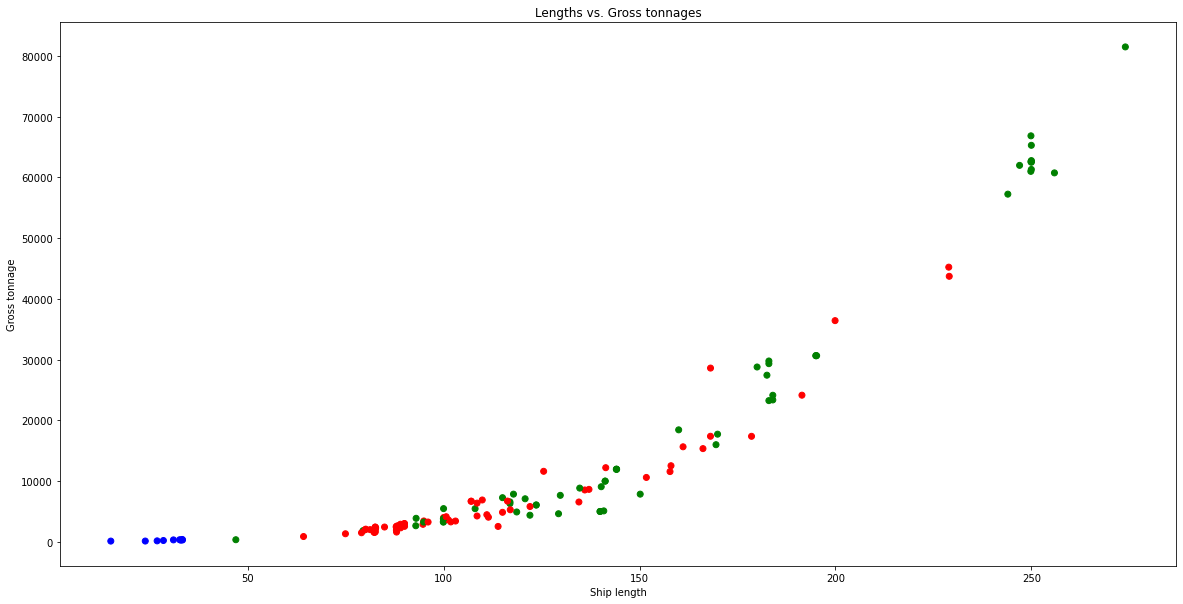

In [11]:
colors = {'Cargo':'red', 'Tanker':'green', 'Tug':'blue'}
plt.figure(figsize=(20,10))
plt.ylabel('Gross tonnage')
plt.xlabel('Ship length')
plt.title('Lengths vs. Gross tonnages')
plt.scatter(data=data, x='Length', y='Gross_tonnage', c=data['Ship_type'].map(colors))
plt.show()

#### <font color = dimgrey> d) Exploit your domain knowledge and transform to improve the expected results and/or to avoid redundancy. 
- Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. Plot the situation after the transformation **1p** 
- You can find the needed information in for example https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried
  

In [12]:
import scipy as sp
from scipy import special
# K=0.2+0.02*log_{10}(V)
# V=(50*ln 10* GT)/(W(500,000,000,000*ln 10* GT)), W is Lambert W function
# V=length*breadth*height

volumes = []
x = 0

for i in data['Gross_tonnage']:
    gt = data['Gross_tonnage'].loc[x]
    V = (50*np.log(10)*gt)/(sp.special.lambertw((500000000000*np.log(10)*gt)))
    volumes.append(V)
    x+=1
    
k_s = []
y = 0

for i in volumes:
    V = volumes[y]
    k = 0.2+0.02*np.log10(V)
    k_s.append(k)
    y+=1


#This did not work as planned, but at least I calculated the volumes and k:s so that might be useful someday

In [13]:
#The easiest way to do the transformations:

data['Transformed_length'] = (data['Length'])**3

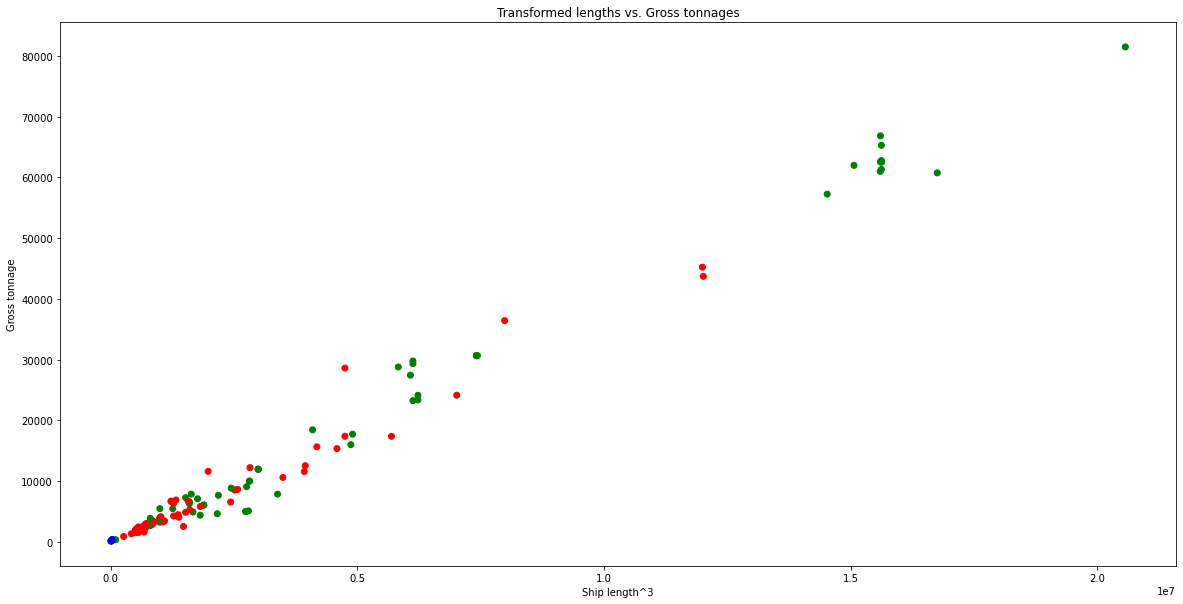

In [14]:
colors = {'Cargo':'red', 'Tanker':'green', 'Tug':'blue'}
plt.figure(figsize=(20,10))
plt.ylabel('Gross tonnage')
plt.xlabel('Ship length^3')
plt.title('Transformed lengths vs. Gross tonnages')
plt.scatter(data=data, x='Transformed_length', y='Gross_tonnage', c=data['Ship_type'].map(colors))
plt.show()

<font color = green> Gross tonnage is a measurement that describes the ship's ability to carry cargo. It is calculated from the ship's volume, which makes the variable "3-dimensional" in a way. If we rise the length to power of 3, we achieve a more linear relationship with gross tonnage, which aids in comparing the two directly.

#### <font color = dimgrey> e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, transformed length, and breadth **1p**

In [15]:
#Standardizing one by one, saving to new columns

data['Speed_standardized'] = (data['Speed']-data['Speed'].mean())/data['Speed'].std()
data['Breadth_standardized'] = (data['Breadth']-data['Breadth'].mean())/data['Breadth'].std()
data['Transformed_length_standardized'] = (data['Transformed_length']-data['Transformed_length'].mean())/data['Transformed_length'].std()

data = data.drop('Transformed_length', axis=1)
print(data)

          MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0    212209000  10.1377  64.3074      Hamina     Cargo           3416   94.91   
1    212436000  13.5256  77.0755      Hamina    Tanker           6280  116.90   
2    219082000   9.9416  74.6762      Hamina    Tanker           9980  141.20   
3    219083000  11.6038  74.7529      Hamina    Tanker           9980  141.20   
4    219426000  11.9203  56.3253      Hamina    Tanker           3219   99.90   
..         ...      ...      ...         ...       ...            ...     ...   
129  273374820  10.0396  74.6253     Vysotsk    Tanker           4979  139.90   
130  273385070   9.3507  74.5454     Vysotsk    Tanker           4979  139.90   
131  273388150   9.7668  68.7159     Vysotsk    Tanker           5075  140.85   
132  636092755  11.1554  73.7013     Vysotsk    Tanker          23240  183.00   
133  357100000  11.2703  59.3888     Vysotsk     Cargo          43717  229.04   

     Breadth  Destination_H

______________
## <font color = lightcoral>2. Classification </font> 

Predict the **ship type** using **speed, destination, transformed length, and breadth** as features. Find an estimation for the classification accuracy (number of correctly classified ships to the total number of ships) using **random training and test sets**. <br>

Below is a summary of exercises for part 2
- a) Produce training and test data **1p**
     - Gather the normalized features and one-hot-coded destination columns as array __X__ (input variables), and the ship type as array **y** (output variable)     
     - Divide the data randomly into training (80%) and test (20%) sets
     - Do you need to use stratification? **Explain your decision**
- b) Train the model and test its performance **1p**
     - Use kNN classifier with k=3
     - Print out the confusion matrix. How does the model perform with different ship types?
     - What is the (total) classification accuracy?
 - Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy **1p**
 - Discuss your results **1p**
 
 ______________

#### <font color = lightcoral> a) Produce training and test data 1p
- Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the ship type as array y (output variable)
- Divide the data randomly into training (80%) and test (20%) sets
- Do you need to use stratification? **Explain your decision**

In [16]:
X = data.loc[:,'Destination_Hamina': 'Transformed_length_standardized']
X = X.to_numpy()

y = data['Ship_type'].to_numpy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(107, 19) (27, 19) (107,) (27,)


<font color = green> Stratification can be useful so that we get a representative training set. 

_______________
#### <font color = lightcoral> b) Train the model and test its performance 1p
- Use a kNN classifier with k=3
- Print out the confusion matrix. <br>
- How does the model perform with different ship types? Where do you think the differences come from?<br>
- What is the (total) classification accuracy?

In [17]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)

cm = sklearn.metrics.confusion_matrix(y_test, predictions, labels=['Cargo', 'Tanker', 'Tug'])
accuracy = sklearn.metrics.accuracy_score(y_test,predictions)
print(cm)
print(accuracy)

[[12  1  0]
 [ 4  8  0]
 [ 2  0  0]]
0.7407407407407407


<font color = Green> The dataset is very small, which contributes to the low accuracy of the model and great variance between runs. It seems that it found no tugs at all, while it most accurately predicted cargo-ships.

__________
## 3. <font color = navy> Classification accuracy using leave-one-out cross validation

Again, predict the **ship type** using **speed, destination, transformed length, and breadth** of the ship as features. Find an estimation for the classification accuracy using *leave-one-out cross validation (LOO CV)*. <br>

 - a) Use leave-one-out cross validation to estimate the model performance **1p**
     - Use kNN classifier with k=3
     - What is the classification accuracy? Compare the result with the one you got in the previous task
 - b) Which method gives better evaluation of the performance of the classifier with this data set? Explain your choice **1p**

In [18]:
loo = sklearn.model_selection.LeaveOneOut()
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

scores = sklearn.model_selection.cross_val_score(model, X, y, cv=loo, n_jobs=-1)

print(np.mean(np.absolute(scores)))

#neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
#neigh.fit(X_train, y_train)
#predictions = neigh.predict(X_test)

#cm = sklearn.metrics.confusion_matrix(y_test, predictions, labels=['Cargo', 'Tanker', 'Tug'])
#accuracy = sklearn.metrics.accuracy_score(y_test,predictions)
#print(cm)
#print(accuracy)


0.753731343283582


#### a) <font color = navy> What is the classification accuracy? Compare the result with the one you got in the previous task **1p**

<font color = green> The classification accuracy in this case was 0.754, which is much better than the accuracy we got from the metrics' accuracy score. </font>
    
#### b) <font color = navy>  Which method gives better evaluation of the performance of the classifier with this data set? Why? 1p

<font color = green> The LeaveOneOut() gives better evaluation, because when re-dividing the dataset and re-evaluating everything, we get constantly same result. The scores are calculated by repeating the model and thus getting more reliable results.

____________
## <font color = forestgreen> 4. Model selection with leave-one-out cross validation

- a) Select the best model (kNN with selection of k) using leave-one-out cross validation (Repeat the model performance estimation with values k=1...30). Which value of k produces the best classification accuracy? **2p**
- b) If the number of k is still increased, what is the limit that the **1p** classification accuracy approaches? Why?
- d) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p** 

In [19]:
accuracy_scores = []
for i in range(1,31):
    loo = sklearn.model_selection.LeaveOneOut()
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)

    scores = sklearn.model_selection.cross_val_score(model, X, y, cv=loo, n_jobs=-1)
    accuracy_scores.append(np.mean(np.absolute(scores)))

    print('For k:' + str(i) + ' Accuracy is ' +str(np.mean(np.absolute(scores))))

print(str(np.amax(accuracy_scores)) + ' where k is ' + str(np.argmax(accuracy_scores)+1))

For k:1 Accuracy is 0.7164179104477612
For k:2 Accuracy is 0.746268656716418
For k:3 Accuracy is 0.753731343283582
For k:4 Accuracy is 0.7686567164179104
For k:5 Accuracy is 0.7388059701492538
For k:6 Accuracy is 0.753731343283582
For k:7 Accuracy is 0.753731343283582
For k:8 Accuracy is 0.7388059701492538
For k:9 Accuracy is 0.746268656716418
For k:10 Accuracy is 0.7388059701492538
For k:11 Accuracy is 0.7388059701492538
For k:12 Accuracy is 0.7238805970149254
For k:13 Accuracy is 0.7164179104477612
For k:14 Accuracy is 0.7089552238805971
For k:15 Accuracy is 0.7238805970149254
For k:16 Accuracy is 0.7164179104477612
For k:17 Accuracy is 0.7014925373134329
For k:18 Accuracy is 0.7164179104477612
For k:19 Accuracy is 0.7313432835820896
For k:20 Accuracy is 0.7164179104477612
For k:21 Accuracy is 0.7164179104477612
For k:22 Accuracy is 0.7164179104477612
For k:23 Accuracy is 0.7238805970149254
For k:24 Accuracy is 0.7238805970149254
For k:25 Accuracy is 0.7238805970149254
For k:26 Accur

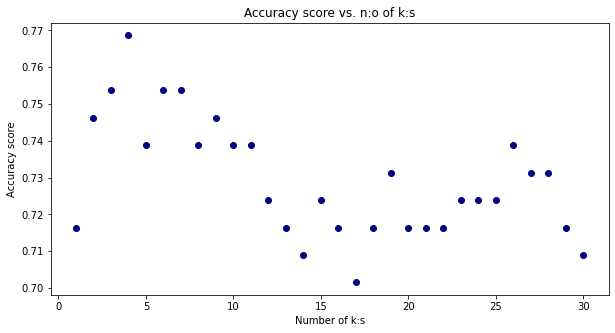

In [20]:
ks = list(range(1,31))
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy score')
plt.xlabel('Number of k:s')
plt.title('Accuracy score vs. n:o of k:s')
plt.scatter(ks, accuracy_scores, c='navy')
plt.show()

#### <font color = navy>  a) Which value of k produces the best classification accuracy? **1p**</font>

<font color = green> k=4 produces the best accuracy.

#### <font color = navy> b) If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?

<font color = green> The number of k over 30 seems to be setting a descending trend, but leaving us at estimated 0.71 accuracy. This is the limit, because increasing the number of neighbors in this specific data set does not give us anything new.

#### <font color = navy> c) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p**

<font color = green> This specific model does not work too well on this data set, so it most likely would not for others either. Maybe for larger datasets it would be more accurate, but for smaller ones there is little hope.

________________
### <font color = red>  5. Testing with training data <font color = red> (this should never be done out of this exercise!) </font>

- Repeat the previous task but use the whole data for training **2p**
- Plot the resulting classification accuracy versus k=1...30. **Include the values from the previous task in the same figure**
- Comment your result. **Why** shouldn't you test with training data?

In [21]:
alldata_acc = []
for i in range(1,31):
    neigh1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    neigh1.fit(X, y)
    predictions1 = neigh.predict(X)

    cm = sklearn.metrics.confusion_matrix(y, predictions1, labels=['Cargo', 'Tanker', 'Tug'])
    accuracy = sklearn.metrics.accuracy_score(y,predictions1)
    alldata_acc.append(accuracy)

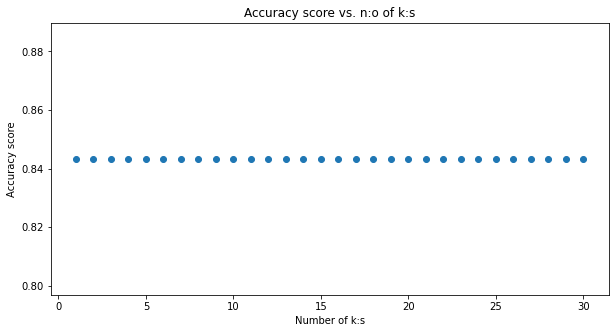

In [22]:
ks = list(range(1,31))
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy score')
plt.xlabel('Number of k:s')
plt.title('Accuracy score vs. n:o of k:s')
plt.scatter(ks, alldata_acc)
plt.show()

 <font color = green> If you test with training data, you might get either overly optimistic or overly pessimistic results. In this case, there is only little to no variation between different number of neighbours, which implies that the model does not really work. The results are also overly optimistic, since we did not get this good accuracy with the train/test splitted data. 